In [1]:
import requests
import re
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Function to get Wikipedia links from an article
def get_wikipedia_links(title, lang="en"):
    base_url = f"https://{lang}.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "links",
        "titles": title,
        "plnamespace": 0,
        "pllimit": "max"
    }
    
    response = requests.get(base_url, params=params)
    data = response.json()
    
    pages = data["query"]["pages"]
    
    links = []
    for page_id in pages:
        if "links" in pages[page_id]:
            links.extend([link["title"] for link in pages[page_id]["links"]])
    
    return links

In [7]:
# Function to get the "Reception" section content for a Wikipedia article
def get_wikipedia_section(title, section, lang="en"):
    base_url = f"https://{lang}.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "extracts",
        "titles": title,
        "explaintext": 1,
        "exsectionformat": "wiki",
        "exlimit": 1,
        "section": section
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    pages = data["query"]["pages"]

    for page_id in pages:
        if "extract" in pages[page_id]:
            return pages[page_id]["extract"]

    return None

# Function to extract the Metacritic score from the "Reception" section text
def extract_metacritic_score(reception_text):
    if reception_text is None:
        return None

    metacritic_pattern = re.compile(r"Metacritic.*?(\d{2,3})")
    match = metacritic_pattern.search(reception_text)

    if match:
        return int(match.group(1))

    return None

In [8]:
# Step 2: List of 5 Nintendo games
nintendo_games = [
    "The Legend of Zelda: Breath of the Wild",
    "Super Mario Odyssey",
    "Mario Kart 8 Deluxe",
    "Animal Crossing: New Horizons",
    "Super Smash Bros. Ultimate"
]

In [9]:
# Step 3: Get linked articles for each game
linked_articles_by_game = {}
for game in nintendo_games:
    linked_articles = get_wikipedia_links(game)
    linked_articles_by_game[game] = linked_articles

In [10]:
# Step 4: Data cleaning - Remove links containing ':' 
for game, links in linked_articles_by_game.items():
    cleaned_links = [link for link in links if ':' not in link]
    linked_articles_by_game[game] = cleaned_links

In [11]:
# Step 5: Create a directed graph using NetworkX
game_graph = nx.DiGraph()

for game, linked_articles in linked_articles_by_game.items():
    for linked_article in linked_articles:
        game_graph.add_edge(game, linked_article)

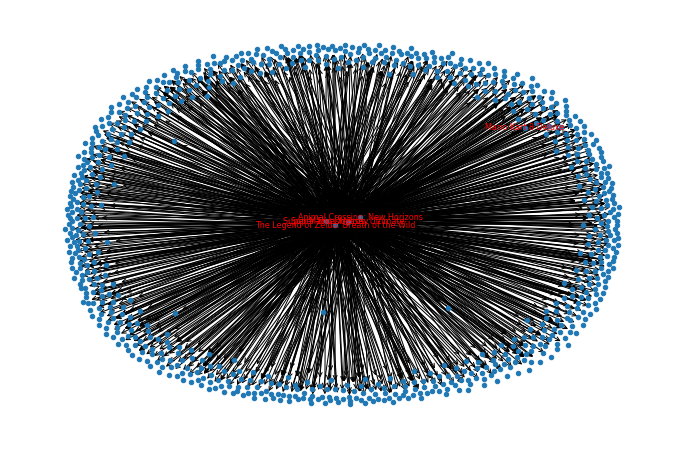

In [6]:
# Step 6: Visualize the graph using Matplotlib
pos = nx.spring_layout(game_graph, seed=42)
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(game_graph, pos, node_size=20)
nx.draw_networkx_edges(game_graph, pos, arrowstyle='->', arrowsize=10)
nx.draw_networkx_labels(game_graph, pos, labels={game: game for game in nintendo_games}, font_size=8, font_color='r')

plt.axis('off')
plt.show()

{'The Legend of Zelda: Breath of the Wild': 201, 'Super Mario Odyssey': 202, 'Animal Crossing: New Horizons': 15}


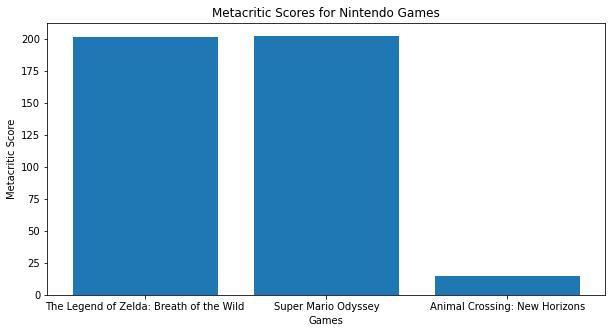

In [14]:
# Get the "Reception" section content and extract Metacritic scores for each game
scores = {}
for game in nintendo_games:
    reception = get_wikipedia_section(game, "Reception")
    score = extract_metacritic_score(reception)
    if score is not None:  # Only add games with valid Metacritic scores
        scores[game] = score
print(scores)

# Plot a bar graph of Metacritic scores
plt.figure(figsize=(10, 5))
plt.bar(scores.keys(), scores.values())
plt.xlabel('Games')
plt.ylabel('Metacritic Score')
plt.title('Metacritic Scores for Nintendo Games')
plt.show()